Import simulator and utilities

In [1]:
from src.base import FDTD2D
from src.utilities import print_setup_info
from src.detectors import PointDetector
from src.sources import PointSource, LineSource

from src.viz import viz2D

### Setting the simulation parameters from a dictionary

In [11]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 200,
    'ny': 200,
    'time_steps': 1000,
    'dx': 0.01,
    'dy': 0.01,
    'polarization': 'TE',
    'use_pml': True,
    'pml_thickness': 20,
    'use_tfsf': False,
    'tfsf_thickness': 10,
    'function': 'sinusoidal',
    'frequency': 1500e6,
    'source_type': 'point_source',
    'source_x': 30,
    'source_y': 30
}

In [4]:
params = {
    'backend': 'pytorch',
    'precision': 'float64',
    'nx': 200,
    'ny': 200,
    'time_steps': 1000,
    'dx': 0.01,
    'dy': 0.01,
    'polarization': 'TE',
    'use_pml': True,
    'pml_thickness': 20,
    'use_tfsf': False,
    'tfsf_thickness': 10,
    'function': 'sinusoidal',
    'frequency': 1500e6,
    'source_type': 'line_source',
    'line_x': 20,
    'line_y1': 40,
    'line_y2': 60,
}

### Testing initializations

In [5]:
sim = FDTD2D(params = params) # to read configuration from python dictionary
#sim = FDTD2D(config_file = 'config.yaml') # to read configuration from file

Reading configuration from dictionary...


### Set detectors

In [7]:
point_detector = PointDetector("point1", (50, 50))
sim.add_detector(point_detector)

### Set sources

In [14]:
point_source = PointSource(source_x=sim.source_x, source_y=sim.source_y, function=sim.function, frequency=sim.frequency)
sim.add_source(point_source)

In [8]:
line_source = LineSource(x=sim.line_x, y1=sim.line_y1, y2=sim.line_y2, function=sim.function, frequency=sim.frequency)
sim.add_source(line_source)

### Set geometry

The geometry for this test is absent. Propagation in air.

### Print simulation info

In [9]:
print_setup_info(sim)

Simulation setup information:
nx: 200
ny: 200
time_steps: 1000
time: 0.0
dx: 0.01
dy: 0.01
dt: 2.358654336749684e-11
use_pml: True
pml_thickness: 20
frequency: 1500000000.0
source_type: line_source
line x: 20
line y1: 40
line y2: 60
c: 299792458
epsilon_0: 8.85418782e-12
mu_0: 1.25663706e-06
geometries: []
sources: [<src.sources.line_source.LineSource object at 0x000001DF8B72AE50>]
detectors: [<src.detectors.point_detector.PointDetector object at 0x000001DF8B740610>]


### Show material distribution

### Test simulation

In [10]:
for i in range(1, sim.time_steps):
        sim.simulation_step(i)
        sim.record_detectors(sim.h_field[:,:,2])
        sim.time += sim.dt

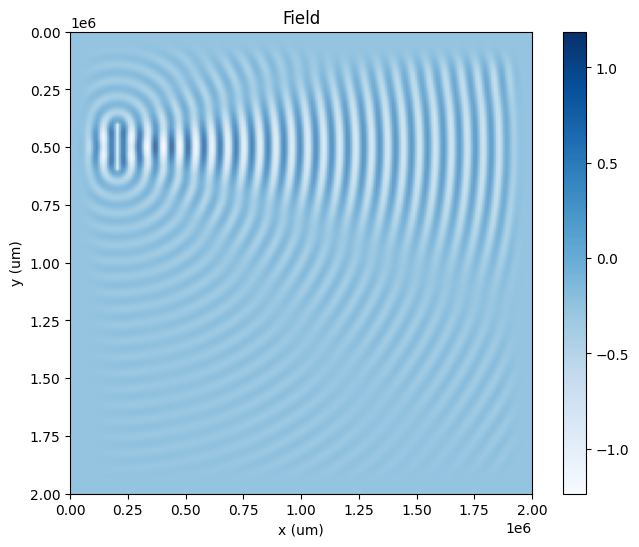

In [11]:
viz2D(sim, sim.h_field[:,:,2])

TypeError: Invalid shape (3, 2, 200) for image data

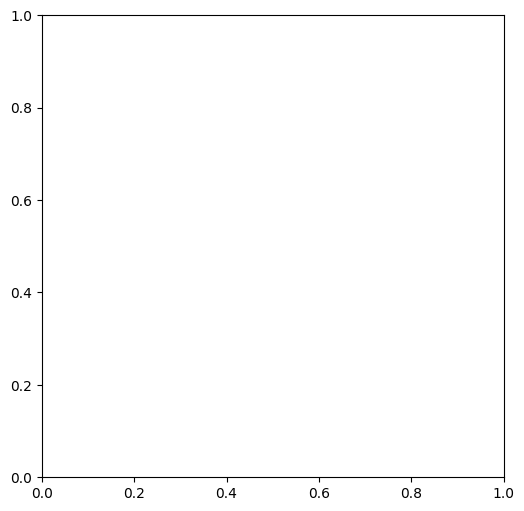

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# assume that you have already initialized your FDTD simulation and calculated the Ez field and the geometry mask
# you can modify the code below according to your simulation setup

# plot the Ez field with cmap jet
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.transpose(sim.e_field[:,:2]), cmap='jet', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0])
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Ez Field')
# plot the geometry mask with cmap binary
ax.imshow(np.transpose(sim.eps_r), cmap='binary', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0],alpha=0.3)

fig.colorbar(im)

plt.show()

c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


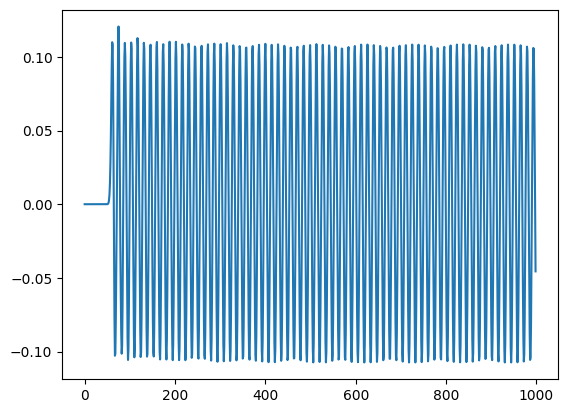

In [18]:
from matplotlib import pyplot as plt
plt.plot(point_detector.recorded_values)

In [10]:
!pip install vtk

In [22]:
import numpy as np
import vtk
from vtk.util import numpy_support

sim.nx, sim.ny = sim.h_field[:,:,2].shape

# Convert the numpy arrays to vtkImageData
energy_data = numpy_support.numpy_to_vtk(sim.h_field[:,:.2].ravel(), deep=True, array_type=vtk.VTK_FLOAT)
geometry_data = numpy_support.numpy_to_vtk(sim.eps_r.ravel(), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)

energy_image = vtk.vtkImageData()
energy_image.SetDimensions(sim.nx, sim.ny, 1)
energy_image.GetPointData().SetScalars(energy_data)

# geometry_image = vtk.vtkImageData()
# geometry_image.SetDimensions(sim.nx, sim.ny, 1)
# geometry_image.GetPointData().SetScalars(geometry_data)

# Create actors for energy and geometry data
energy_mapper = vtk.vtkDataSetMapper()
energy_mapper.SetInputData(energy_image)
energy_actor = vtk.vtkActor()
energy_actor.SetMapper(energy_mapper)

# geometry_mapper = vtk.vtkDataSetMapper()
# geometry_mapper.SetInputData(geometry_image)
# geometry_actor = vtk.vtkActor()
# geometry_actor.SetMapper(geometry_mapper)

# Set up the renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(energy_actor)
# renderer.AddActor(geometry_actor)
renderer.SetBackground(0.2, 0.2, 0.2)

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetSize(800, 800)

# Set up the interactor and start the visualization
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(render_window)
interactor.Initialize()
interactor.Start()

TypeError: slice indices must be integers or None or have an __index__ method